## Mount Drive

In [38]:
# from google.colab import drive
# drive.mount("/content/drive")

## Importing Packages

In [39]:
# pip install numpy==1.22

In [40]:
# Fetching Dataset
# from sklearn.datasets import fetch_openml

# Processing Data
import numpy as np, pandas as pd

# Scaling Features
from sklearn.preprocessing import MinMaxScaler

# Binarizing Output
from sklearn.preprocessing import LabelBinarizer

# Spliting Train & Test Set
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating and Training a CNN Model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

## Fetching Dataset

In [41]:
# X, y = fetch_openml("mnist_784", version = 1, return_X_y = True, as_frame = False)
dataset_dir = "../Datasets/mnist/"
# dataset_dir = "/kaggle/input/mnist-784/mnist/"
dataset_train = pd.read_csv(dataset_dir + "train.csv")
dataset_test = pd.read_csv(dataset_dir + "test.csv")
# dataset_submission = pd.read_csv(dataset_dir + "sample_submission.csv")

In [42]:
dataset_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dataset_train['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [44]:
dataset_test['label'].value_counts()

label
1    3193
7    2892
2    2813
3    2790
0    2771
9    2770
8    2762
4    2752
6    2739
5    2518
Name: count, dtype: int64

In [45]:
dataset_test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dataset_test['label'].value_counts()

label
1    3193
7    2892
2    2813
3    2790
0    2771
9    2770
8    2762
4    2752
6    2739
5    2518
Name: count, dtype: int64

In [47]:
dataset_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [48]:
dataset_test.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,4.446107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,2.893929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [49]:
X_train = dataset_train.iloc[:, 1:]
y_train = dataset_train.iloc[:, 0]
X_test = dataset_test.iloc[:, 1:]
y_test = dataset_test.iloc[:, 0]

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 784)
(42000,)
(28000, 784)
(28000,)


In [51]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [53]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
27995    9
27996    9
27997    9
27998    9
27999    9
Name: label, Length: 28000, dtype: int64

## Scaling Features

In [55]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(42000, 784))

In [57]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(28000, 784))

## Binarizing Output

In [58]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_train.shape

(42000, 10)

In [59]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(42000, 10))

In [60]:
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], shape=(28000, 10))

## Spliting Train & Test Set


In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 45)

In [62]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600, 10) (8400, 10)


In [63]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(33600, 28, 28, 1)

In [64]:
X_val = X_val.reshape(-1, 28, 28, 1)
X_val.shape

(8400, 28, 28, 1)

In [65]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

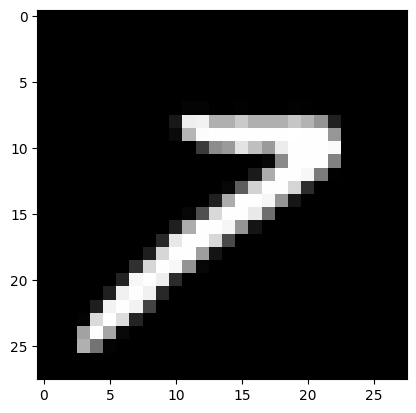

In [66]:
plt.imshow(X_train[45], cmap = "gray")

## Image Augmentation


In [67]:
# Define ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.4,
    shear_range = 0.5,
    cval = 0.0,
    fill_mode = 'constant')

In [68]:
# Generate augmented data
batch_size = 32
train_generator = datagen.flow(X_train, y_train, batch_size = batch_size, shuffle = False)

In [69]:
len(train_generator)

1050

## Creating and Training a CNN Model


In [75]:
cnn_model = models.Sequential([
    # layers.Input((28, 28, 1)),

    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    # layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    # layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    # layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dropout(rate = 0.5),
    layers.Dense(units = 10, activation = 'softmax')
])

In [71]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
n_epoch = 100
acc_callback = EarlyStopping(monitor = 'val_accuracy', verbose = 1, patience = 15, mode = 'max', restore_best_weights = True, start_from_epoch = 30)
# loss_callback = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 15, mode = 'min', restore_best_weights = True, start_from_epoch = 30)

In [77]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [78]:
# hist = cnn_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = n_epoch, callbacks = [acc_callback, loss_callback])
hist = cnn_model.fit(train_generator, validation_data = (X_val, y_val), epochs = n_epoch, callbacks = acc_callback)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.7854 - loss: 0.6655 - val_accuracy: 0.9669 - val_loss: 0.1035
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 87s 76ms/step - accuracy: 0.9005 - loss: 0.3257 - val_accuracy: 0.9773 - val_loss: 0.0768
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9219 - loss: 0.2546 - val_accuracy: 0.9768 - val_loss: 0.0727
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9330 - loss: 0.2205 - val_accuracy: 0.9807 - val_loss: 0.0624
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.9398 - loss: 0.2031 - val_accuracy: 0.9837 - val_loss: 0.0605
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 49ms/step - accuracy: 0.9453 - loss: 0.1863 - val_accuracy: 0.9848 - val_loss: 0.0555
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 45ms/step - accuracy: 0.9504 - loss: 0.1655 - val_accuracy: 0.9836 - val_loss: 0.0548
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 

In [79]:
# history_test = cnn_model.evaluate(X_val, y_val)
history_test = cnn_model.evaluate(X_test, y_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9899 - loss: 0.0520


## Making Predictions


In [80]:
# y_predicted_by_model = cnn_model.predict(X_test)
y_predicted_by_model = cnn_model.predict(X_train)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step


In [81]:
print(y_predicted_by_model[0])
# print("\n")
print(np.argmax(y_predicted_by_model[0]))

[6.5631045e-10 1.0979980e-10 9.9989998e-01 2.0530737e-05 3.0563688e-10
 7.3559163e-16 1.5679224e-16 7.7016295e-05 2.5408654e-06 2.9596228e-10]
2


In [82]:
for i in range(5):
  print(np.argmax(y_predicted_by_model[i]), end = ' ')

2 5 3 6 6 

In [83]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]
y_predicted_labels[:5]

[np.int64(2), np.int64(5), np.int64(3), np.int64(6), np.int64(6)]

In [84]:
# y_test
y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(33600, 10))

In [85]:
# dataset_submission["Label"] = y_predicted_labels
# dataset_submission

In [86]:
# dataset_submission.to_csv('submission.csv', index = False)

[Kaggle Notebook](https://www.kaggle.com/code/avishekchy1578/mnist-784-cnn-handwritten-digit-recognition)